In [1]:
# Import the libraries and supress warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data file
df=pd.read_csv(r'C:\Users\hp\Downloads\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- The dataset has 167 rows and 10 columns respectively. Also, it is free of any null values.

In [4]:
df.describe(percentiles=[.1,.25,.5,.75,.9,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


# Univariate Analysis

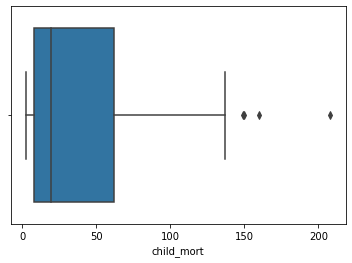

In [5]:
sns.boxplot(df.child_mort)

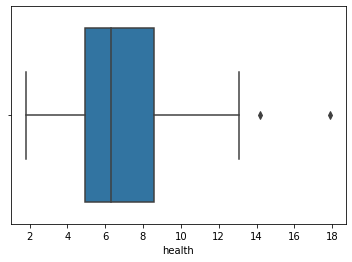

In [6]:
sns.boxplot(df.health)

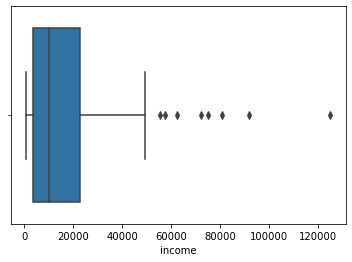

In [7]:
sns.boxplot(df.income)

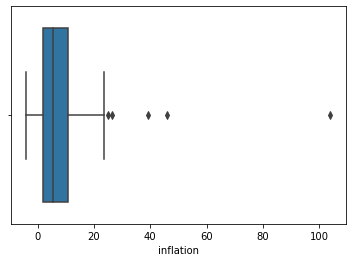

In [8]:
sns.boxplot(df.inflation)

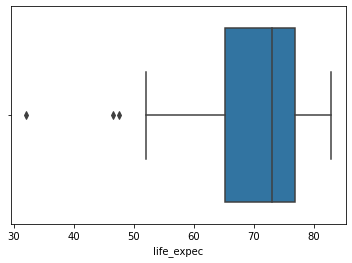

In [9]:
sns.boxplot(df.life_expec)

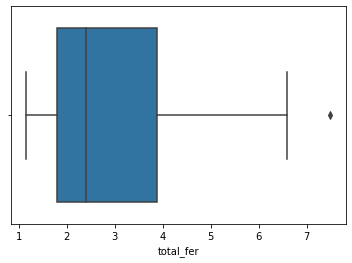

In [10]:
sns.boxplot(df.total_fer)

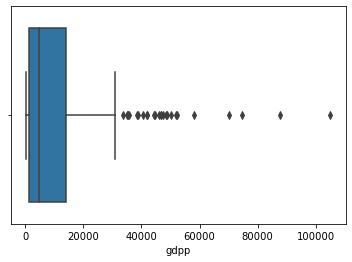

In [11]:
sns.boxplot(df.gdpp)

- All the variables of significance have some clear outlier observations. But in this case, rather than removing, we would retain them since we have to report back atleast 5 countries to our CEO which are in the direst need of the funds, for which, these extreme observations would help in separating the needy countries from the well-off ones.

# Data Preprocessing

 Now we'll slice the variables of most relevance from the dataframe viz, 'child_mort','gdpp','income' and 'life_expec'; that will help in making the clusters.                                                                                                                 

In [12]:
df1=df[['child_mort','gdpp','income','life_expec']]
df1.head()

,child_mort,gdpp,income,life_expec
0,90.2,553,1610,56.2
1,16.6,4090,9930,76.3
2,27.3,4460,12900,76.5
3,119.0,3530,5900,60.1
4,10.3,12200,19100,76.8


In [13]:
# Rescaling the dataframe df1

df1_scaled=pd.DataFrame(StandardScaler().fit_transform(df1))
df1_scaled.columns = ['child_mort','gdpp','income','life_expec']
df1_scaled.head()

,child_mort,gdpp,income,life_expec
0,1.291532,-0.679180,-0.808245,-1.619092
1,-0.538949,-0.485623,-0.375369,0.647866
2,-0.272833,-0.465376,-0.220844,0.670423
3,2.007808,-0.516268,-0.585043,-1.179234
4,-0.695634,-0.041817,0.101732,0.704258


# Modelling

## 1) k-Means Clustering

In [14]:
# now we use the kmeans method of clustering on the rescaled dataset
kmeans=KMeans(n_clusters=4,max_iter=100)
kmeans.fit(df1_scaled)

KMeans(max_iter=100, n_clusters=4)

In [15]:
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1,
       3, 2, 3, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0,
       0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 3, 0, 1, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       0, 0, 1, 1, 2, 0, 1, 3, 3, 3, 3, 3, 0, 2, 3, 3, 1, 3, 0, 1, 3, 3,
       1, 2, 3, 0, 3, 1, 0, 0, 3, 3, 1, 3, 0, 2, 3, 1, 3, 3, 1, 3, 3, 3,
       3, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1])

### Silhouette Score

Now we'll calculate the silhouette score for the given kmeans model

In [16]:
cluster_range= [2, 3, 4, 5, 6, 7, 8]
for num_clusters in cluster_range:
    
    #initialise kmeans
    kmeans=KMeans(n_clusters=num_clusters,max_iter=100)
    kmeans.fit(df1_scaled)
    
    cluster_labels=kmeans.labels_
    
    #silhouette score
    silhouette_avg=round(silhouette_score(df1_scaled,cluster_labels),3)
    print('For {0} clusters, the silhouette score is {1}'.format(num_clusters,silhouette_avg))


For 2 clusters, the silhouette score is 0.503
For 3 clusters, the silhouette score is 0.514
For 4 clusters, the silhouette score is 0.511
For 5 clusters, the silhouette score is 0.45
For 6 clusters, the silhouette score is 0.417
For 7 clusters, the silhouette score is 0.382
For 8 clusters, the silhouette score is 0.356


In [17]:
cluster_labels

array([3, 7, 7, 3, 7, 7, 2, 0, 0, 2, 4, 4, 2, 7, 7, 0, 2, 3, 2, 2, 7, 1,
       7, 0, 7, 3, 3, 1, 3, 0, 2, 3, 3, 7, 7, 7, 1, 3, 1, 7, 3, 7, 4, 4,
       0, 2, 7, 2, 2, 3, 1, 7, 2, 0, 0, 1, 1, 2, 0, 1, 4, 2, 2, 3, 3, 1,
       6, 7, 0, 1, 2, 7, 2, 0, 4, 4, 2, 0, 7, 2, 1, 1, 0, 2, 1, 7, 7, 3,
       3, 7, 7, 5, 7, 1, 3, 7, 7, 3, 4, 1, 7, 1, 2, 2, 7, 2, 3, 1, 1, 1,
       0, 4, 3, 3, 5, 4, 1, 7, 2, 7, 2, 7, 4, 5, 7, 7, 1, 2, 4, 1, 7, 7,
       3, 0, 7, 4, 1, 1, 4, 4, 7, 2, 1, 2, 0, 0, 1, 1, 7, 1, 3, 2, 7, 7,
       1, 3, 2, 0, 4, 0, 7, 2, 1, 7, 2, 1, 3])

### Sum of squared distance

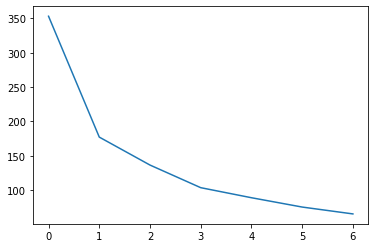

In [18]:
# Elbow curve
# elbow-curve/SSD
ssd = []
cluster_range = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df1_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd)

- As is clear from the above plot, after the 3rd label(i.e. four clusters), the fall in the SSD of the data points from their respective centroids is gradual, and the silhouette score corresponding to four clusters is pretty decent one (0.511); so we can build the final model having four clusters.

In [19]:
#Final model using with 4 clusters 
kmeans=KMeans(n_clusters=4,max_iter=100)
kmeans.fit(df1_scaled)
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 3, 0, 2, 1, 1, 1, 1, 1, 0, 3, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 3, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [20]:
# Labels assignment
df1['cluster_id']=kmeans.labels_
df1.head()

,child_mort,gdpp,income,life_expec,cluster_id
0,90.2,553,1610,56.2,2
1,16.6,4090,9930,76.3,1
2,27.3,4460,12900,76.5,1
3,119.0,3530,5900,60.1,2
4,10.3,12200,19100,76.8,1


In [21]:
# Now adding the country column to 'df1' dataframe'
df1['country']=df.country
df1.head()

,child_mort,gdpp,income,life_expec,cluster_id,country
0,90.2,553,1610,56.2,2,Afghanistan
1,16.6,4090,9930,76.3,1,Albania
2,27.3,4460,12900,76.5,1,Algeria
3,119.0,3530,5900,60.1,2,Angola
4,10.3,12200,19100,76.8,1,Antigua and Barbuda


In [22]:
df1.country[df1.cluster_id==2].groupby(by=[df1.child_mort,df1.income,df1.gdpp,df1.life_expec]).sum()

child_mort  income  gdpp   life_expec
52.5        13300   6350   57.1                          Botswana
53.7        12000   7280   54.3                      South Africa
55.2        1420    482    61.7                           Eritrea
56.0        8460    5190   58.6                           Namibia
58.8        4410    1350   66.2                             India
62.2        1390    413    60.8                        Madagascar
            2480    967    62.8                             Kenya
62.7        1730    1490   60.7                          Kiribati
63.6        1350    563    64.6                            Rwanda
63.7        15400   8750   62.9                             Gabon
63.9        5190    2740   60.4                       Congo, Rep.
64.4        3720    988    66.8                           Myanmar
66.8        2180    1000   64.0                           Senegal
71.9        2090    702    59.3                          Tanzania
74.7        3060    1310   62.2       

## Visualisations


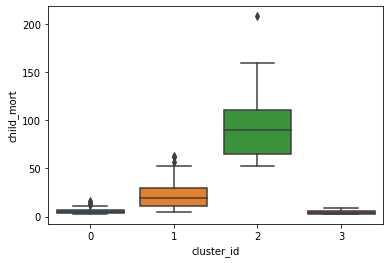

In [23]:
# Plotting boxplots for each clusters
sns.boxplot(x='cluster_id',y='child_mort',data=df1)
plt.show()

- Child mortality is highest (~100 on an average) for the third cluster.

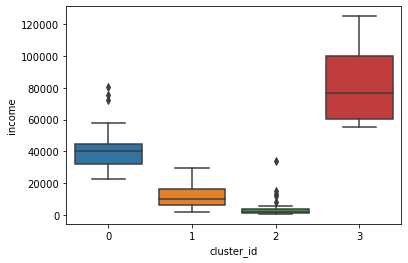

In [24]:
sns.boxplot(x='cluster_id',y='income',data=df1)
plt.show()

- Income of the people belonging to the countries belonging to the 3rd cluster remains the lowest of all the four clusters.

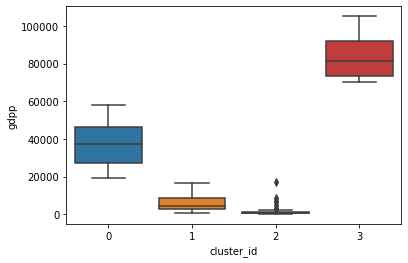

In [25]:
sns.boxplot(x='cluster_id',y='gdpp',data=df1)
plt.show()

- gdpp too is the lowest for the 3rd cluster countries.

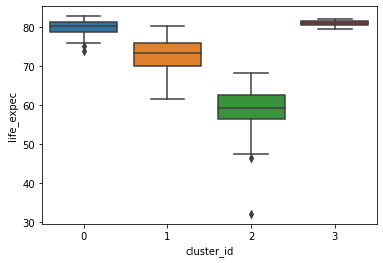

In [26]:
sns.boxplot(x='cluster_id',y='life_expec',data=df1)
plt.show()

- Average life span for the people in the 3rd cluster countries is the least at ~60.

##### So, from the k-means method of clustering, we got four optimal clusters and out of them, the second cluster is the point of focus for us. In terms of income, gdpp and life expectancy, it remains the lowest and the child mortality stays at the top; which clearly suggests that the countries in this cluster need to be aided at the earliest.

## 2) Heirarchical Clustering

Now we will build the model for the same dataset using heirarchical clustering

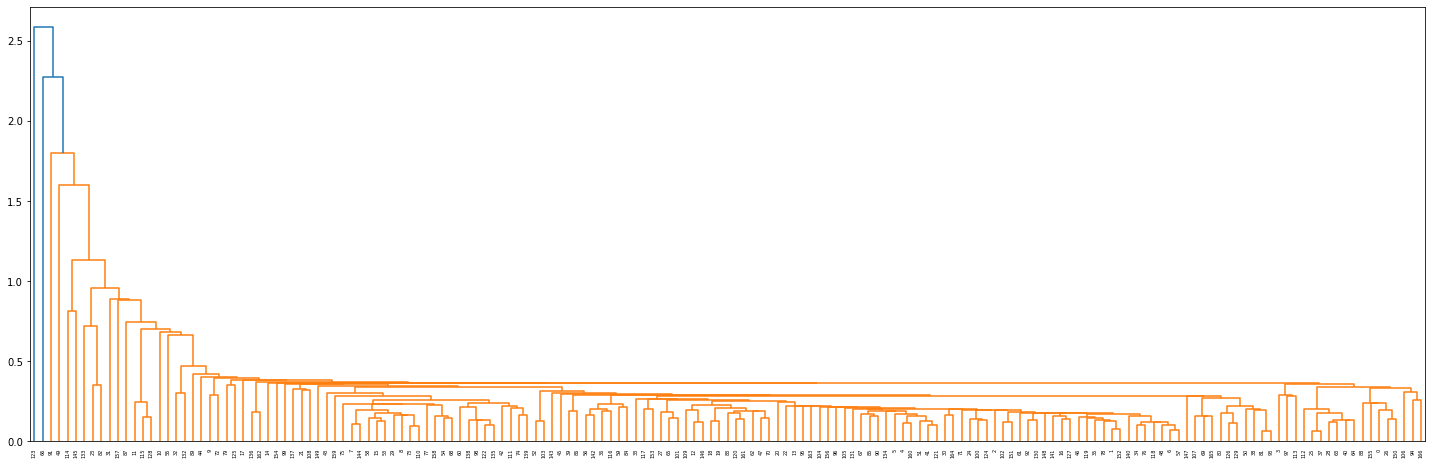

In [27]:
# Single linkage method
plt.figure(figsize=(25,8))
mergings=linkage(df1_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

In [57]:
# Cutting the dendrogram with three clusters
cluster_labels1=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels1

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [58]:
df1['cluster_labels1']=cluster_labels1
df1.head()

,child_mort,gdpp,income,life_expec,cluster_id,country,cluster_labels1,cluster_labels2
0,90.2,553,1610,56.2,2,Afghanistan,0,0
1,16.6,4090,9930,76.3,1,Albania,1,1
2,27.3,4460,12900,76.5,1,Algeria,1,1
3,119.0,3530,5900,60.1,2,Angola,0,0
4,10.3,12200,19100,76.8,1,Antigua and Barbuda,1,1


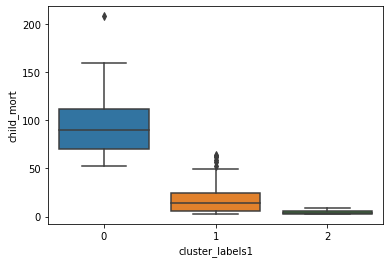

In [59]:
sns.boxplot('cluster_labels1','child_mort',data=df1)

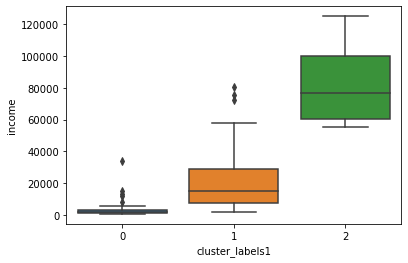

In [60]:
sns.boxplot('cluster_labels1','income',data=df1)

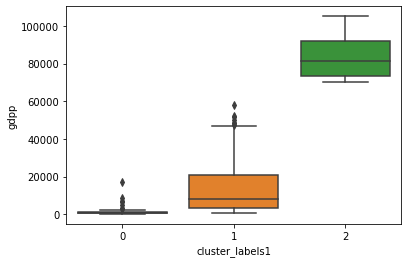

In [61]:
sns.boxplot('cluster_labels1','gdpp',data=df1)

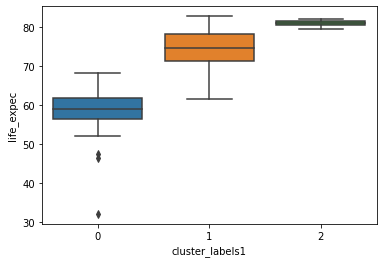

In [62]:
sns.boxplot('cluster_labels1','life_expec',data=df1)

In [63]:
df1.country[df1.cluster_labels1==2].groupby(by=[df1.child_mort,df1.income,df1.gdpp,df1.life_expec]).sum()

child_mort  income  gdpp    life_expec
2.8         91700   105000  81.3           Luxembourg
3.2         62300   87800   81.0               Norway
4.5         55500   74600   82.2          Switzerland
9.0         125000  70300   79.5                Qatar
Name: country, dtype: object

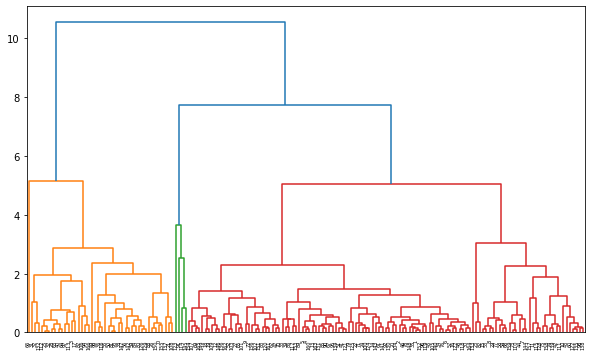

In [64]:
# Complete linkage method
plt.figure(figsize=(10,6))
mergings=linkage(df1_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [65]:
# Again cutting the dendrogram at three clusters again.
cluster_labels2=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels2

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [66]:
df1['cluster_labels2']=cluster_labels2
df1.head()

,child_mort,gdpp,income,life_expec,cluster_id,country,cluster_labels1,cluster_labels2
0,90.2,553,1610,56.2,2,Afghanistan,0,0
1,16.6,4090,9930,76.3,1,Albania,1,1
2,27.3,4460,12900,76.5,1,Algeria,1,1
3,119.0,3530,5900,60.1,2,Angola,0,0
4,10.3,12200,19100,76.8,1,Antigua and Barbuda,1,1


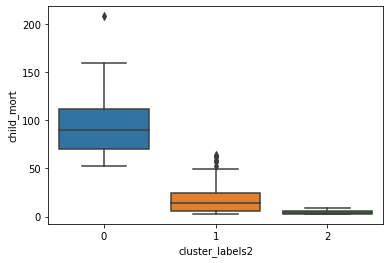

In [67]:
sns.boxplot('cluster_labels2','child_mort',data=df1)

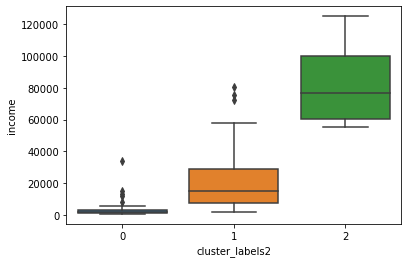

In [68]:
sns.boxplot('cluster_labels2','income',data=df1)

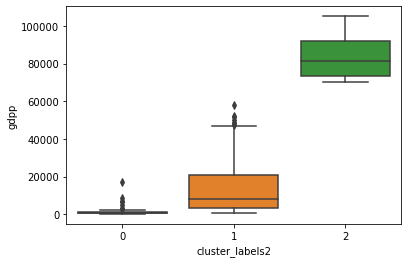

In [69]:
sns.boxplot('cluster_labels2','gdpp',data=df1)

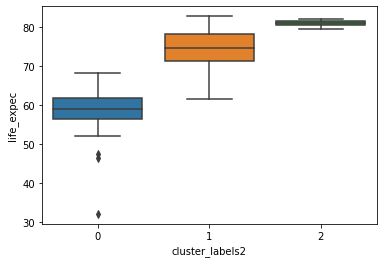

In [70]:
sns.boxplot('cluster_labels2','life_expec',data=df1)

In [71]:
df1.country[df1.cluster_labels2==0].groupby(by=[df1.child_mort,df1.income,df1.gdpp,df1.life_expec]).sum()

child_mort  income  gdpp   life_expec
52.5        13300   6350   57.1                          Botswana
53.7        12000   7280   54.3                      South Africa
55.2        1420    482    61.7                           Eritrea
56.0        8460    5190   58.6                           Namibia
62.2        1390    413    60.8                        Madagascar
            2480    967    62.8                             Kenya
62.7        1730    1490   60.7                          Kiribati
63.6        1350    563    64.6                            Rwanda
63.7        15400   8750   62.9                             Gabon
63.9        5190    2740   60.4                       Congo, Rep.
66.8        2180    1000   64.0                           Senegal
71.9        2090    702    59.3                          Tanzania
74.7        3060    1310   62.2                             Ghana
76.7        3370    1480   66.3                             Sudan
78.9        3980    1140   63.8       

Now we performed both single and complete linkage heirarchical clustering for the given dataset and from both the methods, we obtained identical results, even though the dendrograms were different. And unlike in kmeans clustering, we chose only three clusters instead of four because fourth cluster only had one observation in it, which could anyways be adjusted to the nearest of the three clusters. 

# Conclusion:

 Considering the k-means clustering model, the second cluster is the one with the highest child mortality rate and also the lowest income, gdpp and life expectancy; the factors that we considered for cluster formation. From this cluster, following are the countries in order of direst need of aid that the CEO of the NGO may consider:
 
#### 1) Haiti
#### 2) Central African Republic
#### 3) Niger
#### 4) Democratic Republic of Congo
#### 5) Sierra Leone
#### 6) Burundi
#### 7) Liberia